<h1 style="text-align:center; color:#ff6b6b; font-size:50px;"><strong>MIDTERM EXAM</strong></h1>

<h1 style="text-align:center; color:#ff6b6b; font-size:30px;"><strong>ITELEC-303</strong></h1><h1 style="text-align:center; color:#ff6b6b; font-size:20px;">Data Analytics</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("datasets\\chicago_2001_present.csv")

<h2>ANALYZING and CHANGING DATA TYPES</h2>

In [2]:
data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [3]:
data['ID'] = data['ID'].astype('Int64')
data['Case Number'] = data['Case Number'].astype('string')
data['Date'] = data['Date'].astype('str')
data['Date'] = data['Date'].str.replace('/', '-')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data['Block'] = data['Block'].astype('string')
data['IUCR'] = data['IUCR'].astype('string')
data['Primary Type'] = data['Primary Type'].astype('string')
data['Description'] = data['Description'].astype('string')
data['Location Description'] = data['Location Description'].astype('string')
data['Arrest'] = data['Arrest'].astype('bool')
data['Domestic'] = data['Domestic'].astype('bool')
data['Beat'] = data['Beat'].astype('Int64')
data['District'] = data['District'].astype('Int64')
data['Ward'] = data['Ward'].astype('Int64')
data['Community Area'] = data['Community Area'].astype('Int64')
data['FBI Code'] = data['FBI Code'].astype('string')
data['X Coordinate'] = data['X Coordinate'].astype('float')
data['Y Coordinate'] = data['Y Coordinate'].astype('float')
data['Year'] = data['Year'].astype('Int64')
data['Updated On'] = pd.to_datetime(data['Updated On'], dayfirst=True, errors='coerce')
data['Latitude'] = data['Latitude'].astype('float')
data['Longitude'] = data['Longitude'].astype('float')
data['Location'] = data['Location'].astype('string')

In [4]:
data.dtypes

ID                               Int64
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type            string[python]
Description             string[python]
Location Description    string[python]
Arrest                            bool
Domestic                          bool
Beat                             Int64
District                         Int64
Ward                             Int64
Community Area                   Int64
FBI Code                string[python]
X Coordinate                   float64
Y Coordinate                   float64
Year                             Int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                string[python]
dtype: object

<h2>CHECKING AND CLEANING NULL VALUES</h2>

In [5]:
data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [10]:
data['Location Description'] = data['Location Description'].fillna(data['Location Description'].mode()[0])
data['District'] = data['District'].fillna(data['District'].mode()[0])
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
data['Ward'] = data['Ward'].fillna(int(data['Ward'].mean()))
data['Community Area'] = data['Community Area'].fillna(int(data['Community Area'].mean()))
data['X Coordinate'] = data['X Coordinate'].fillna(int(data['X Coordinate'].mean()))
data['Y Coordinate'] = data['Y Coordinate'].fillna(int(data['Y Coordinate'].mean()))
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())

In [11]:
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [12]:
locdep_df = data['Location Description'].unique()
locdep_df

<StringArray>
[                                            'RESIDENCE',
                                              'SIDEWALK',
                                                'STREET',
                                           'HOTEL/MOTEL',
                'PARKING LOT / GARAGE (NON RESIDENTIAL)',
                                                  'BANK',
                                       'OTHER (SPECIFY)',
                           'RESIDENCE - PORCH / HALLWAY',
                                    'RESIDENCE - GARAGE',
                                          'CTA PLATFORM',
 ...
                                    'PUBLIC HIGH SCHOOL',
                                           'LIVERY AUTO',
                                               'FACTORY',
                                          'LOADING DOCK',
                          'VEHICLE - OTHER RIDE SERVICE',
 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)',
          'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY B

In [13]:
primetp_df = data['Primary Type'].unique()
primetp_df

<StringArray>
[       'OFFENSE INVOLVING CHILDREN',                         'NARCOTICS',
                           'ROBBERY',               'CRIM SEXUAL ASSAULT',
                   'CRIMINAL DAMAGE',                             'THEFT',
                          'BURGLARY',                       'SEX OFFENSE',
               'MOTOR VEHICLE THEFT',                           'BATTERY',
                          'HOMICIDE',           'CRIMINAL SEXUAL ASSAULT',
                     'OTHER OFFENSE',                 'WEAPONS VIOLATION',
                'DECEPTIVE PRACTICE',                          'STALKING',
                 'CRIMINAL TRESPASS',                           'ASSAULT',
                      'PROSTITUTION',                        'KIDNAPPING',
                             'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
  'INTERFERENCE WITH PUBLIC OFFICER',            'PUBLIC PEACE VIOLATION',
              'LIQUOR LAW VIOLATION',                      'INTIMIDATION',
           

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q1. What are the Major Crimes in Chicago?</strong></h1>

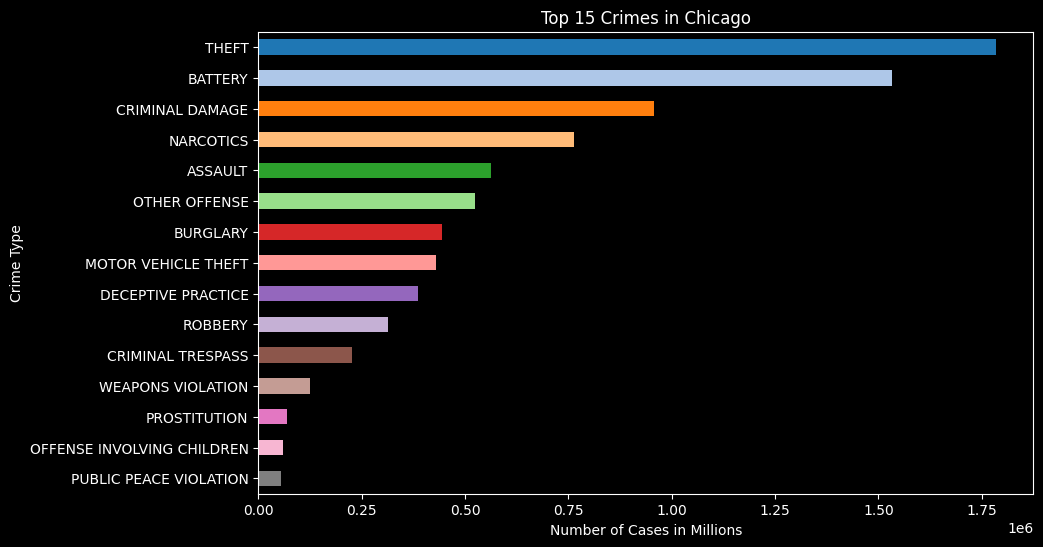

Primary Type
THEFT                         1785150
BATTERY                       1532491
CRIMINAL DAMAGE                956346
NARCOTICS                      763342
ASSAULT                        563123
OTHER OFFENSE                  524325
BURGLARY                       444757
MOTOR VEHICLE THEFT            429681
DECEPTIVE PRACTICE             387055
ROBBERY                        314286
CRIMINAL TRESPASS              226310
WEAPONS VIOLATION              124642
PROSTITUTION                    70405
OFFENSE INVOLVING CHILDREN      60359
PUBLIC PEACE VIOLATION          54729
Name: count, dtype: Int64

In [14]:
top15crim = data['Primary Type'].value_counts().head(15)
plt.style.use("dark_background")
top15crim.plot(kind='barh', figsize=(10,6), color=plt.cm.tab20.colors)
plt.title("Top 15 Crimes in Chicago")
plt.xlabel("Number of Cases in Millions")
plt.ylabel("Crime Type")
plt.xticks(rotation=0)
plt.gca().invert_yaxis()

plt.show()
top15crim

<div style="color:#E79696"><h3>Insight 1:</h3><p style="font-size:16px">Based on the graph, Theft has the highest number of cases reaching over 1.7 million, making it the most dominant crime in the data. It is common since theft occurs in various environments such as streets, public transport, and shops where opportunities are frequent.</p></div>

<div style="color:#E79696"><h3>Insight 2:</h3><p style="font-size:16px">Battery follows closely with around 1.5 million cases, reflecting that violent crimes involving physical harm are also a major concern.</p></div>

<div style="color:#E79696"><h3>Insight 3:</h3><p style="font-size:16px">Property-related crimes such as Criminal Damage, Burglary, and Motor Vehicle Theft all appear in the top categories, indicating that crime against property plays a significant role alongside violent offenses.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q2. How does the amount of crimes change over year?</strong></h1>

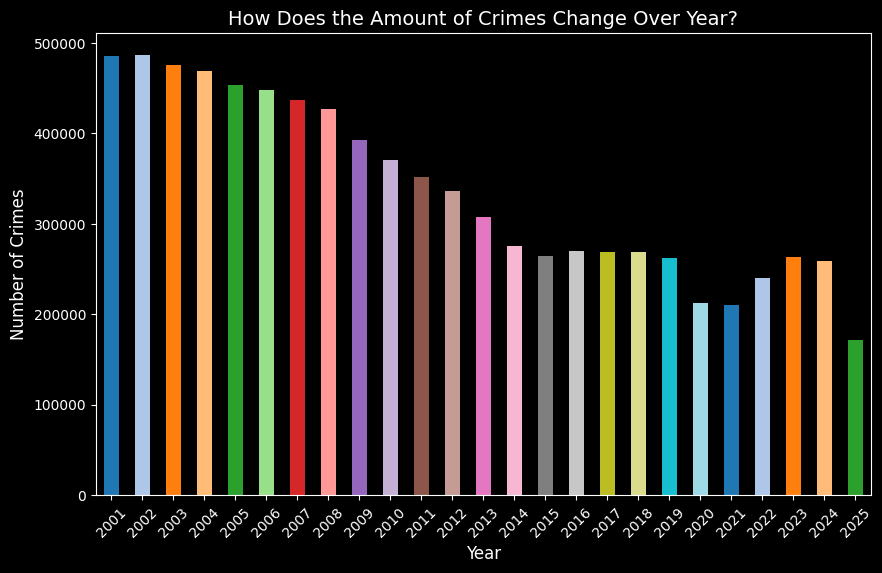

Year
2001    485954
2002    486830
2003    475996
2004    469439
2005    453785
2006    448198
2007    437105
2008    427211
2009    392859
2010    370555
2011    352039
2012    336367
2013    307603
2014    275866
2015    264867
2016    269930
2017    269259
2018    269105
2019    261648
2020    212643
2021    209571
2022    239911
2023    263119
2024    258688
2025    171650
Name: count, dtype: Int64

In [15]:
crimperyr = data['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
crimperyr.plot(kind='bar', color=plt.cm.tab20.colors)

plt.title("How Does the Amount of Crimes Change Over Year?", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)

plt.show()

crimperyr


<div style="color:#E79696"><h3>Insight 4:</h3><p style="font-size:16px">The amount of crimes reached its highest in 2002 with around 486,830 cases, but gradually decreased over time. By 2008, the total already dropped to about 427,211, and this downward trend continued until 2014 when it reached 275,866. Although there was a slight increase from 2016 to 2019, the count fell sharply in 2020–2021 due to the pandemic, recording the lowest values in recent history. Afterward, crime counts slowly picked up again in 2022 and 2023, but still remained far lower than the early 2000s.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q3. What district area, does crimes frequently happen?</strong></h1>

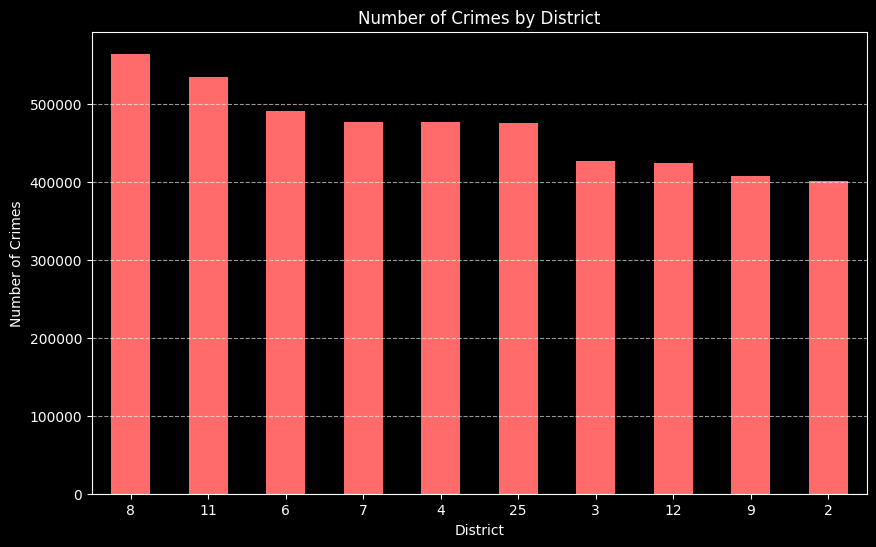

District
8     564238
11    533900
6     491396
7     476344
4     476306
25    475067
3     426761
12    424199
9     408052
2     400750
Name: count, dtype: Int64

In [21]:
crime_district_df = data['District'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
crime_district_df.plot(kind='bar', color='#ff6b6b')
plt.title("Number of Crimes by District")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

plt.show()
crime_district_df

<div style="color:#E79696"><h3>Insight 5:</h3><p style="font-size:16px">Crimes are most frequently recorded in District 8 with 564,238 cases, followed closely by District 11 with 533,900 cases. Districts 6, 7, 4, and 25 also show notably high crime volumes, each with around 470k–490k incidents. On the other hand, Districts 2, 9, and 12 still report high numbers but comparatively lower than the top five. This distribution shows that while crime occurs across all districts, certain areas particularly Districts 8 and 11 serve as major hotspots for criminal activity in the city.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q4. How does the area with the most frequently crime count changes over the years?</strong></h1>

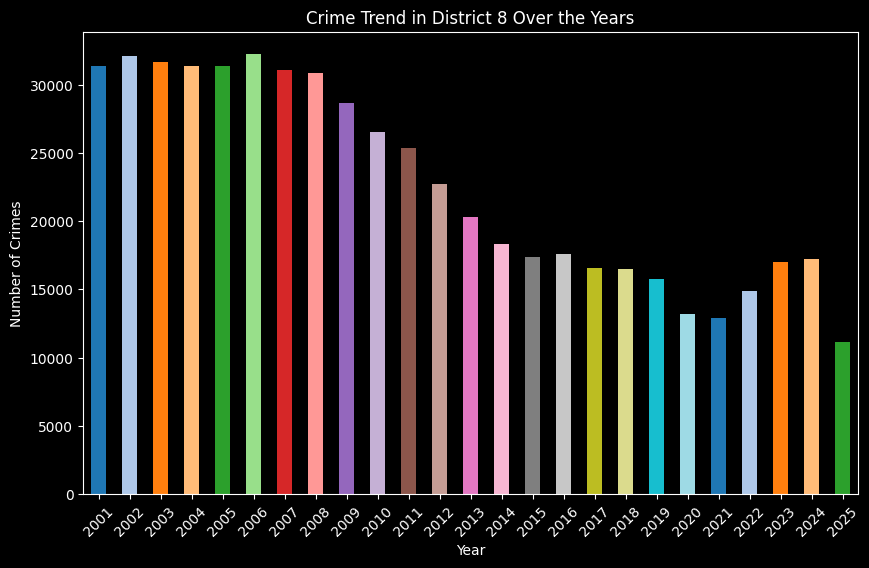

Year
2001    31361
2002    32100
2003    31709
2004    31406
2005    31356
2006    32278
2007    31112
2008    30900
2009    28643
2010    26533
2011    25389
2012    22726
2013    20308
2014    18298
2015    17351
2016    17576
2017    16592
2018    16486
2019    15747
2020    13208
2021    12904
2022    14866
2023    17020
2024    17258
2025    11111
dtype: int64

In [17]:
dist8 = data[data['District'] == 8]

dist8_yearly = dist8.groupby('Year').size()

plt.figure(figsize=(10,6))
dist8_yearly.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title("Crime Trend in District 8 Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

dist8_yearly


<div style="color:#E79696"><h3>Insight 6:</h3><p style="font-size:16px">In District 8, crimes peaked in 2006 with 32,278 cases, showing consistently high levels above 31,000 during the early 2000s. However, starting in 2009, crime levels began to steadily decrease, dropping to 26,533 by 2010 and further down to 18,298 in 2014. The lowest point was observed in 2021 with only 12,904 cases, coinciding with the overall citywide decline. Afterward, a small recovery appeared between 2022 and 2024, where numbers climbed back up to over 17,000, though still far below the early 2000s values. This shows that the highest district are also affected in terms of decline of crimes over the years based on the general crime rate.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q5. What time in a day crimes happened?</strong></h1>

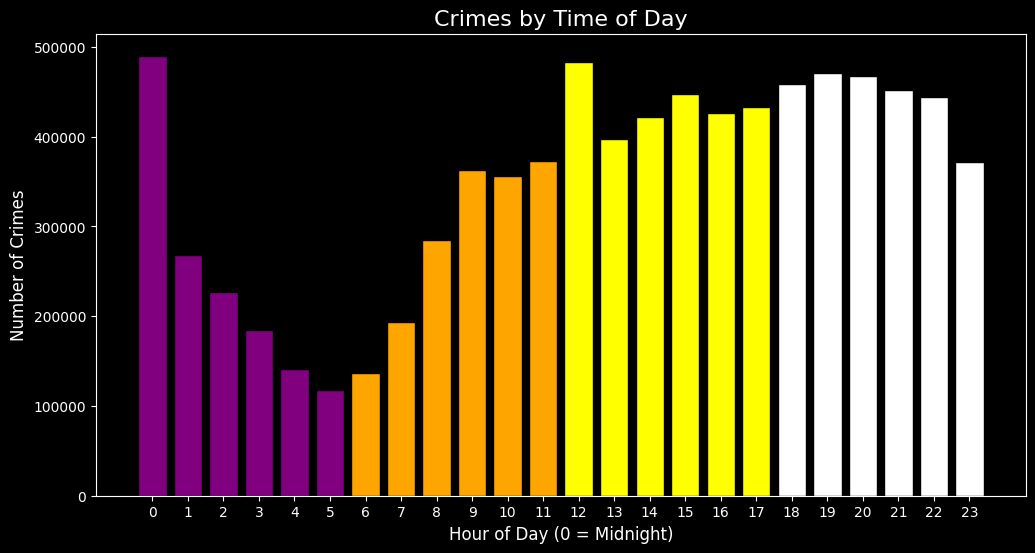

In [18]:

data['Hour'] = data['Date'].dt.hour  

crim_per_hour = data['Hour'].value_counts().sort_index()

colors = []
for hour in crim_per_hour.index:
    if 0 <= hour <= 5:
        colors.append("purple")
    elif 6 <= hour <= 11:
        colors.append("orange")
    elif 12 <= hour <= 17:
        colors.append("yellow")
    else: 
        colors.append("white")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(crim_per_hour.index, crim_per_hour.values, color=colors, edgecolor="black")
plt.title("Crimes by Time of Day", fontsize=16)
plt.xlabel("Hour of Day (0 = Midnight)", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(range(24))
plt.show()


<div style="color:#E79696"><h3>Insight 7:</h3><p style="font-size:16px">Crimes in the city are least common during the early morning hours when most people are asleep, but they start to rise steadily during the late morning and reach a noticeable peak around noon. The afternoon into early evening records some of the highest activity, showing that crimes often align with busier periods when people are outside for work, school, or travel. During nighttime, crimes remain relatively high, particularly in the late evening, but gradually decline again past midnight as activity slows down. This pattern suggests that crime is strongly tied to daily human routines, being lowest at dawn and highest during midday through evening.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q6. What Location Description does holds the most records of crimes?</strong></h1>

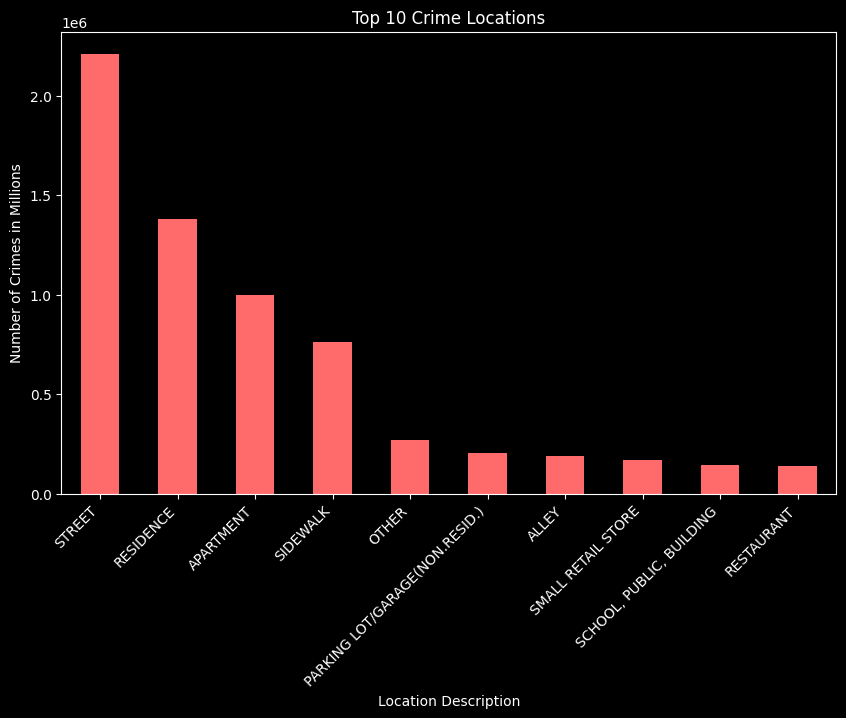

Location Description
STREET                            2212180
RESIDENCE                         1381812
APARTMENT                          998492
SIDEWALK                           761765
OTHER                              269939
PARKING LOT/GARAGE(NON.RESID.)     202930
ALLEY                              187348
SMALL RETAIL STORE                 168926
SCHOOL, PUBLIC, BUILDING           146368
RESTAURANT                         141262
Name: count, dtype: Int64

In [19]:
# Top 10 Location Descriptions with most crimes
top_locations = data['Location Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_locations.plot(kind='bar', color='#ff6b6b')
plt.title("Top 10 Crime Locations")
plt.xlabel("Location Description")
plt.ylabel("Number of Crimes in Millions")
plt.xticks(rotation=45, ha="right")
plt.show()

top_locations


<div style="color:#E79696"><h3>Insight 8:</h3><p style="font-size:16px">Crimes are most frequently recorded on streets, with about 2.2 million incidents, making them the most common crime location in the city. Residences come next with around 1.3 million cases, followed by apartments with nearly 1 million cases. Sidewalks also contribute a large share with over 760k incidents, highlighting the risks in open public areas.
</p></div>

<div style="color:#E79696"><h3>Insight 9:</h3><p style="font-size:16px">Other places such as parking lots, alleys, retail stores, schools, and restaurants also appear in the top ten, though their counts are much lower compared to the top four. This shows that the majority of crimes happen in everyday spaces where people either live or move frequently.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q7. What Location Description area holds the records of the most committed theft incidents?</strong></h1>

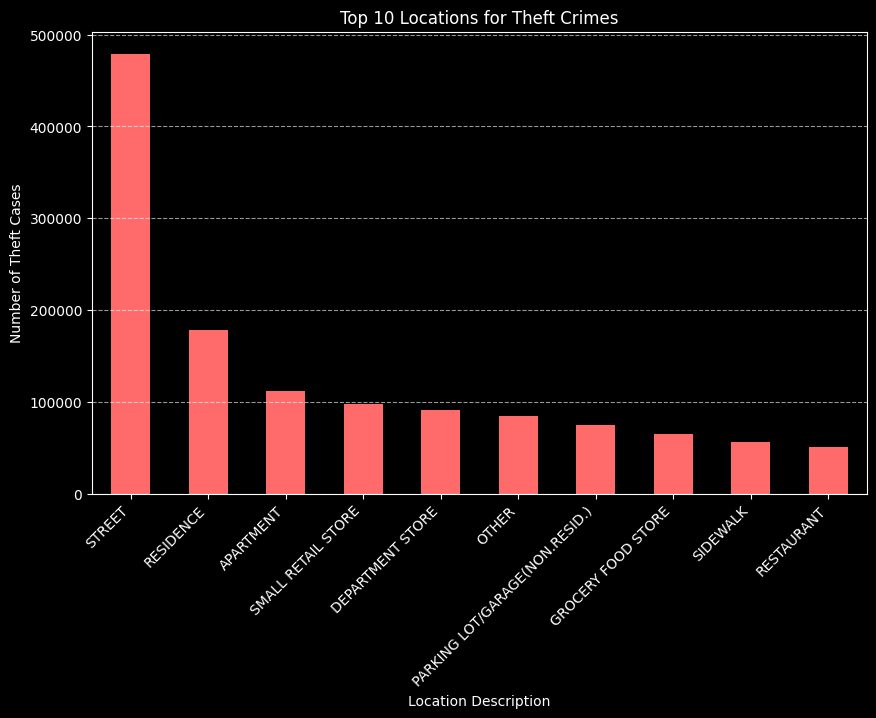

Location Description
STREET                            479227
RESIDENCE                         178143
APARTMENT                         111411
SMALL RETAIL STORE                 97727
DEPARTMENT STORE                   90818
OTHER                              84899
PARKING LOT/GARAGE(NON.RESID.)     74735
GROCERY FOOD STORE                 65478
SIDEWALK                           56020
RESTAURANT                         51376
Name: count, dtype: Int64

In [28]:
theft_df = data[data['Primary Type'] == "THEFT"]
top_theft_loc = theft_df['Location Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_theft_loc.plot(kind='bar', color='#ff6b6b')
plt.title("Top 10 Locations for Theft Crimes")
plt.xlabel("Location Description")
plt.ylabel("Number of Theft Cases")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.show()
top_theft_loc

<div style="color:#E79696"><h3>Insight 10:</h3><p style="font-size:16px">Theft incidents are most common on streets with around 479k cases. Residences (178k) and apartments (111k) also record many incidents. Commercial places like small retail stores (97k) and department stores (90k) follow, showing theft is frequent in both public areas and private spaces.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q8. What month in a year does Theft and Robbery frequently happen?
</strong></h1>

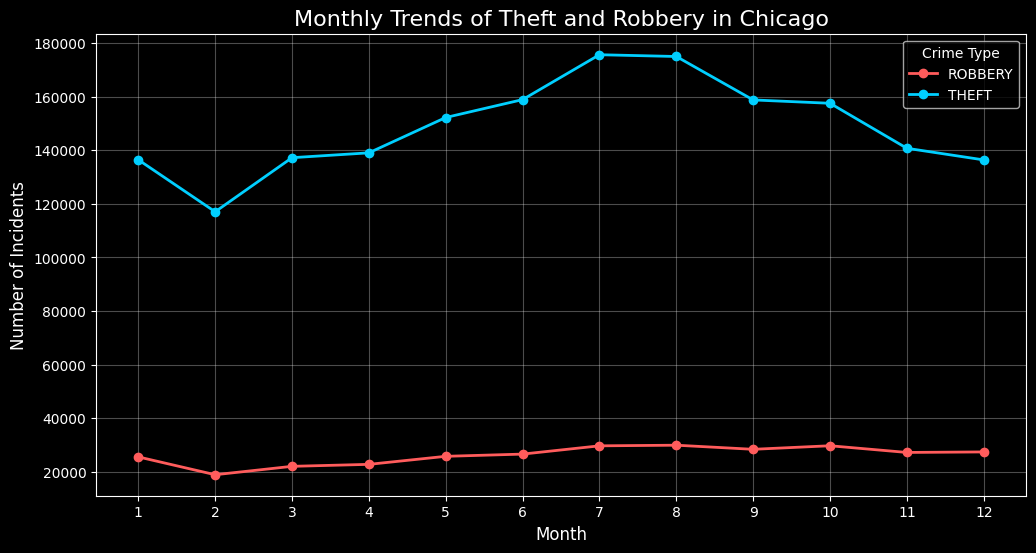

In [61]:
crime_subset = data[data['Primary Type'].isin(['THEFT', 'ROBBERY'])]

crime_subset['Month'] = crime_subset['Date'].dt.month

monthly_counts = crime_subset.groupby(['Month', 'Primary Type'])['ID'].count().unstack()

plt.style.use("dark_background")
ax = monthly_counts.plot(
    figsize=(12,6),
    marker='o',
    color={'THEFT':'#00CFFF', 'ROBBERY':'#FF5C5C'},
    linewidth=2
)

plt.title("Monthly Trends of Theft and Robbery in Chicago", fontsize=16, color='white')
plt.xlabel("Month", fontsize=12, color='white')
plt.ylabel("Number of Incidents", fontsize=12, color='white')
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend(title='Crime Type', fontsize=10)
plt.show()


<div style="color:#E79696"><h3>Insight 11:</h3><p style="font-size:16px">In terms of Theft, the count is consistently higher compared to Robbery and peaks around July and August with incidents reaching more than 170,000, suggesting that mid-year months are the most vulnerable for theft-related crimes. After August, Theft cases gradually decline but still remain high throughout the rest of the year.
</p></div>

<div style="color:#E79696"><h3>Insight 12:</h3><p style="font-size:16px">In terms of Robbery, the numbers are much lower compared to Theft but still show a clear seasonal trend. Robbery counts slightly increase during the summer months, particularly in June to October, reaching around 30,000 incidents at its highest, before tapering off towards the end of the year.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q9. Within a year, how often Small Retail Store and Convenience Store involved in a crime?
</strong></h1>

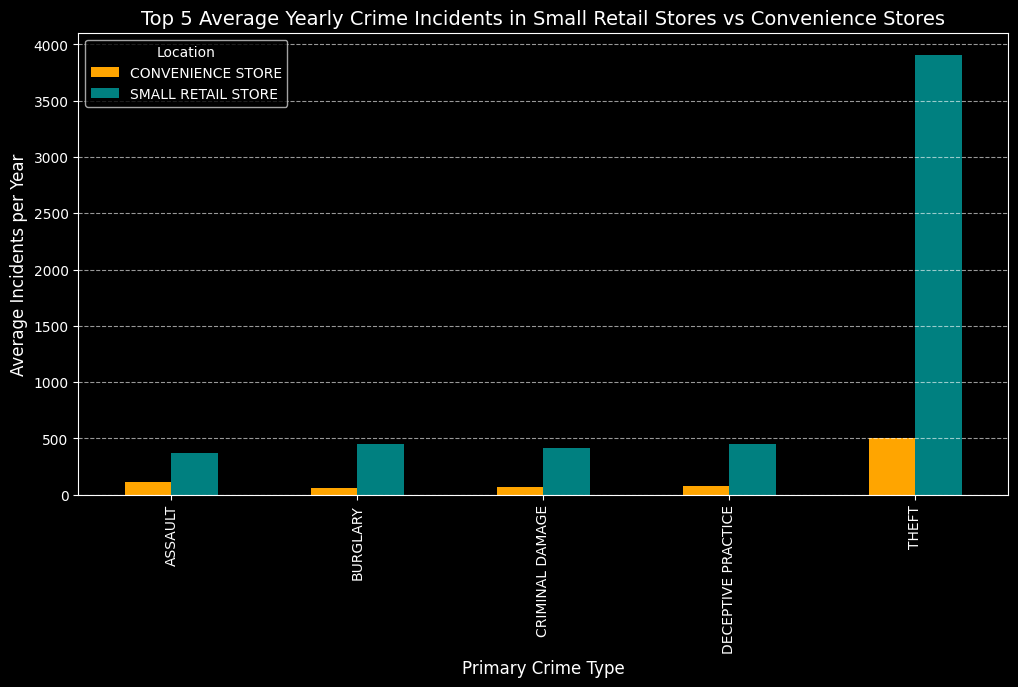

Location Description,CONVENIENCE STORE,SMALL RETAIL STORE
Primary Type,,
ASSAULT,115.043478,371.32
BURGLARY,56.695652,452.52
CRIMINAL DAMAGE,64.956522,417.60
DECEPTIVE PRACTICE,73.391304,453.80
THEFT,505.086957,3909.08


In [26]:
store_crimes = data[data['Location Description'].isin(['SMALL RETAIL STORE', 'CONVENIENCE STORE'])]
avg_store_crimes = (
    store_crimes.groupby(['Location Description','Primary Type','Year'])
    .size()
    .groupby(level=[0,1])
    .mean()
    .reset_index(name='Average Incidents')
)
top5_types = (
    avg_store_crimes.groupby('Primary Type')['Average Incidents']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
avg_store_crimes = avg_store_crimes[avg_store_crimes['Primary Type'].isin(top5_types)]

pivot_avg = avg_store_crimes.pivot(index='Primary Type', columns='Location Description', values='Average Incidents')

pivot_avg.plot(kind='bar', figsize=(12,6), color=['orange','teal'])
plt.title("Top 5 Average Yearly Crime Incidents in Small Retail Stores vs Convenience Stores", fontsize=14)
plt.xlabel("Primary Crime Type", fontsize=12)
plt.ylabel("Average Incidents per Year", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Location", fontsize=10)
plt.show()

pivot_avg


<div style="color:#E79696"><h3>Insight 13:</h3><p style="font-size:16px">In terms of crime within Small Retail Stores and Convenience Stores, Theft holds the highest average incidents per year with Small Retail Stores reaching almost 4,000 cases, while Convenience Stores only record about 500. Other crime types such as Burglary, Assault, Criminal Damage, and Deceptive Practices show significantly lower averages, all under 500 incidents per year. This highlights that Theft is the dominant crime in both store types, but particularly severe in Small Retail Stores compared to Convenience Stores.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q10. What Narcotics related crime description is the most frequent?
</strong></h1>

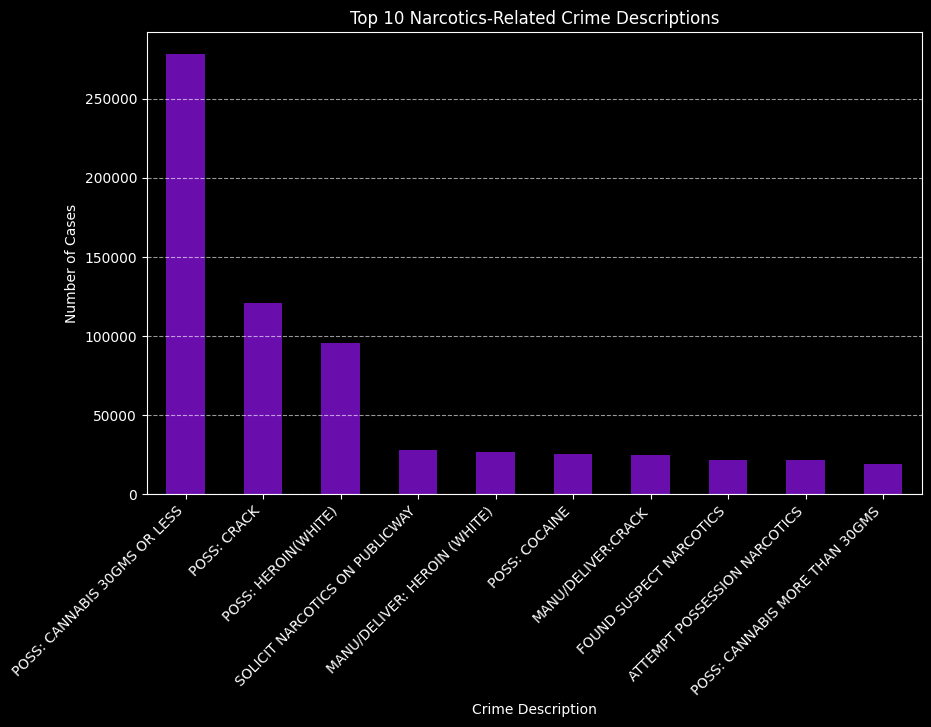

Description
POSS: CANNABIS 30GMS OR LESS      278136
POSS: CRACK                       121109
POSS: HEROIN(WHITE)                95786
SOLICIT NARCOTICS ON PUBLICWAY     27854
MANU/DELIVER: HEROIN (WHITE)       26444
POSS: COCAINE                      25470
MANU/DELIVER:CRACK                 24947
FOUND SUSPECT NARCOTICS            21797
ATTEMPT POSSESSION NARCOTICS       21374
POSS: CANNABIS MORE THAN 30GMS     19089
Name: count, dtype: Int64

In [34]:
narcotics_df = data[data['Primary Type'] == "NARCOTICS"]

top_narcotics_desc = narcotics_df['Description'].value_counts().head(10)


plt.figure(figsize=(10,6))
top_narcotics_desc.plot(kind='bar', color='#6a0dad') 
plt.title("Top 10 Narcotics-Related Crime Descriptions")
plt.xlabel("Crime Description")
plt.ylabel("Number of Cases")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.show()

top_narcotics_desc


<div style="color:#E79696"><h3>Insight 14:</h3><p style="font-size:16px">In terms of Narcotics-related crimes, possession of cannabis 30 grams or less is by far the most frequent, with incidents exceeding 275,000, followed by possession of crack cocaine and possession of heroin/white, which record around 120,000 and 95,000 incidents respectively. Other crime descriptions such as solicitation of narcotics on public way, manufacture/delivery of heroin (white), and possession of cocaine show significantly lower numbers, all under 30,000 incidents per year. This highlights that minor possession offenses dominate the Narcotics crime category, while more serious trafficking or delivery crimes occur much less frequently.
</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q11. How does Narcotics related crimes changes over year?
</strong></h1>

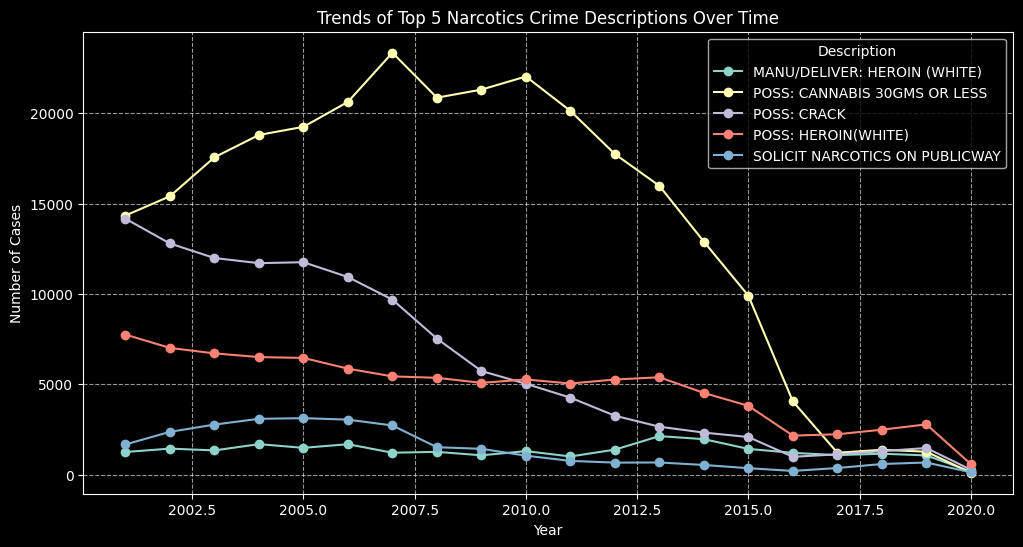

Description,MANU/DELIVER: HEROIN (WHITE),POSS: CANNABIS 30GMS OR LESS,POSS: CRACK,POSS: HEROIN(WHITE),SOLICIT NARCOTICS ON PUBLICWAY
Year,,,,,
2001,1259,14337,14162,7754,1675
2002,1446,15401,12790,7014,2373
2003,1347,17557,11987,6713,2775
2004,1693,18791,11702,6509,3094
2005,1489,19242,11755,6461,3130
2006,1690,20621,10936,5868,3049
2007,1219,23340,9685,5440,2726
2008,1268,20855,7528,5362,1523
2009,1076,21299,5739,5082,1435


In [37]:
narcotics_df = data[data['Primary Type'] == "NARCOTICS"]

# Group by Year + Description
desc_trends = (
    narcotics_df.groupby(['Year', 'Description'])
    .size()
    .reset_index(name='Count')
)

# Focus only on the top 5 descriptions overall
top5_desc = narcotics_df['Description'].value_counts().head(5).index
desc_trends = desc_trends[desc_trends['Description'].isin(top5_desc)]

# Pivot for plotting
pivot_df = desc_trends.pivot(index='Year', columns='Description', values='Count').fillna(0)

# Line graph
plt.figure(figsize=(12,6))
for desc in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[desc], marker='o', label=desc)

plt.title("Trends of Top 5 Narcotics Crime Descriptions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend(title="Description")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

pivot_df

<div style="color:#E79696"><h3>Insight 15:</h3><p style="font-size:16px">The cases of Possession of Cannabis (30gms or less) increased quickly from around 14,000 in 2001 to more than 23,000 in 2007, making it the most common narcotics crime during those years. After 2011, the number dropped fast until it reached only about 100 cases in 2020. This big decrease is likely because of the legalization and lighter penalties for cannabis in Illinois.</p></div>

<div style="color:#E79696"><h3>Insight 16:</h3><p style="font-size:16px">Other narcotics crimes like Possession of Crack and Possession of Heroin (White) also went down over the years. Possession of Crack dropped from more than 14,000 cases in 2001 to below 300 in 2020, while Manufacture/Delivery of Heroin (White) also slowly decreased. This shows that drug-related arrests in Chicago have lessened, possibly due to changes in drug laws and better control by authorities.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q12. What Location Description does Homicide Crimes frequently happened?
</strong></h1>

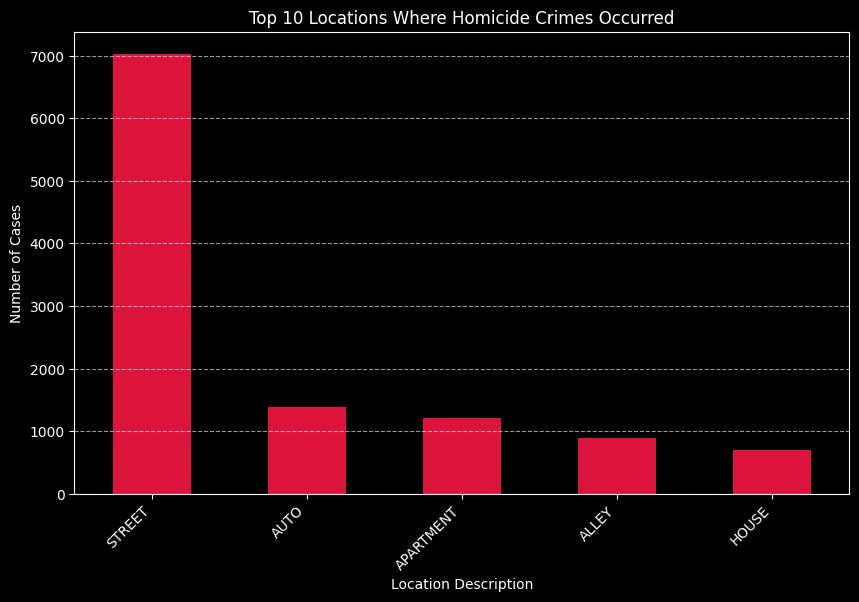

Location Description
STREET       7027
AUTO         1389
APARTMENT    1218
ALLEY         894
HOUSE         709
Name: count, dtype: Int64

In [49]:
homicide_df = data[data['Primary Type'] == "HOMICIDE"]
top_homicide_locations = homicide_df['Location Description'].value_counts().head(5)

plt.figure(figsize=(10,6))
top_homicide_locations.plot(kind='bar', color='crimson')
plt.title("Top 10 Locations Where Homicide Crimes Occurred")
plt.xlabel("Location Description")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

top_homicide_locations


<div style="color:#E79696"><h3>Insight 17:</h3><p style="font-size:16px">Based on the data, the majority of homicide crimes occurred on the street with 7,027 cases, making it the most common location. This shows that public spaces remain the primary setting for violent crimes.</p></div>

<div style="color:#E79696"><h3>Insight 18:</h3><p style="font-size:16px">Other significant locations include autos (1,389 cases), apartments (1,218 cases), alleys (894 cases), and houses (709 cases). While smaller in number compared to streets, these figures highlight that homicides also occur frequently in both vehicles and residential areas.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q13. How often does Kidnapping case recorded per year?
</strong></h1>

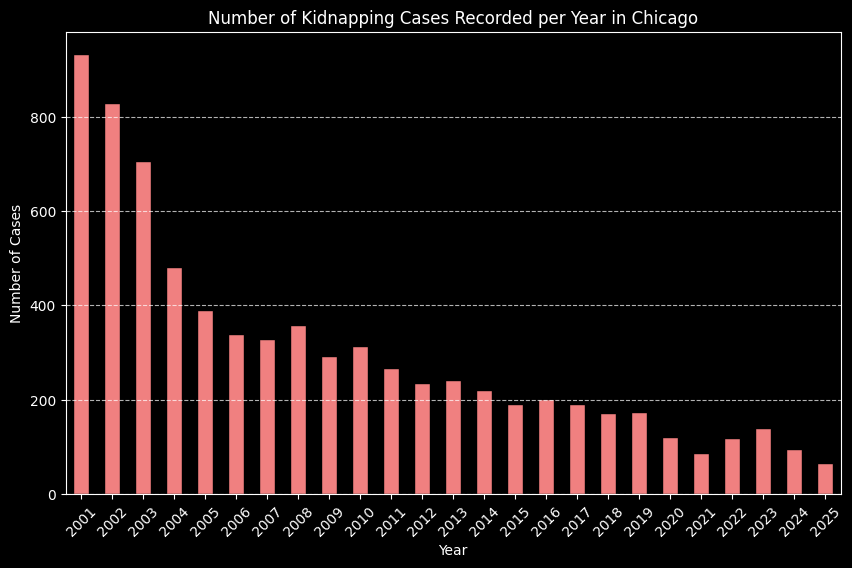

In [58]:
kidnapping = data[data['Primary Type'] == 'KIDNAPPING']
kidnapping_per_year = kidnapping['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
kidnapping_per_year.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title("Number of Kidnapping Cases Recorded per Year in Chicago")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<div style="color:#E79696"><h3>Insight 19:</h3><p style="font-size:16px">Based on the bar graph, kidnapping cases were most frequent in the early 2000s, with 2001 recording the highest number of cases reaching over 900. After 2003, the cases began to steadily decline, showing a clear downward trend over the years. This suggests that kidnapping incidents have become less common in Chicago, possibly due to improved safety measures and faster law enforcement responses.</p></div>

<div style="color:#E79696"><h3>Insight 20:</h3><p style="font-size:16px">From 2010 onwards, the number of kidnapping cases continued to decrease gradually, stabilizing between 100–200 cases per year. However, occasional small increases can still be observed, showing that while the overall trend is downward, isolated incidents continue to happen across the years. By 2024–2025, the recorded cases dropped to their lowest point, showing how much rarer kidnapping has become compared to the early 2000s.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q14. What place or area does Kidnapping often happened?
</strong></h1>

In [88]:
import folium
from folium.plugins import HeatMap

kidnap_df = data[data['Primary Type'] == "KIDNAPPING"]
kidnap_df = kidnap_df.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(
    location=[kidnap_df['Latitude'].mean(), kidnap_df['Longitude'].mean()],
    zoom_start=11)
heat_data = kidnap_df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=8, blur=1, max_zoom=13).add_to(m)

m.save("kidnapping_heatmap.html")
m

<div style="color:#E79696"><h3>Insight 21:</h3><p style="font-size:16px">Kidnapping incidents are scattered across Chicago, but most of them are recorded on the streets. This shows that people are more at risk when they are outside in public spaces, especially along major streets, roads, and highways where there is higher movement.</p></div>

<div style="color:#E79696"><h3>Insight 22:</h3><p style="font-size:16px">The heatmap also reveals a few cases of kidnapping near the airport. Although these cases are not many, they highlight that kidnapping can happen even in high-security areas. This makes airports a sensitive location that still requires close monitoring.</p></div>

<div style="color:#E79696"><h3>Insight 23:</h3><p style="font-size:16px">There are certain neighborhoods where kidnapping incidents are not just scattered but are concentrated within a short distance, sometimes only within a 5-block radius. These clusters suggest that some areas are repeatedly affected and may need stronger community protection and police presence.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q15. Which crime description occurs most frequently among Burglary-related cases?
</strong></h1>

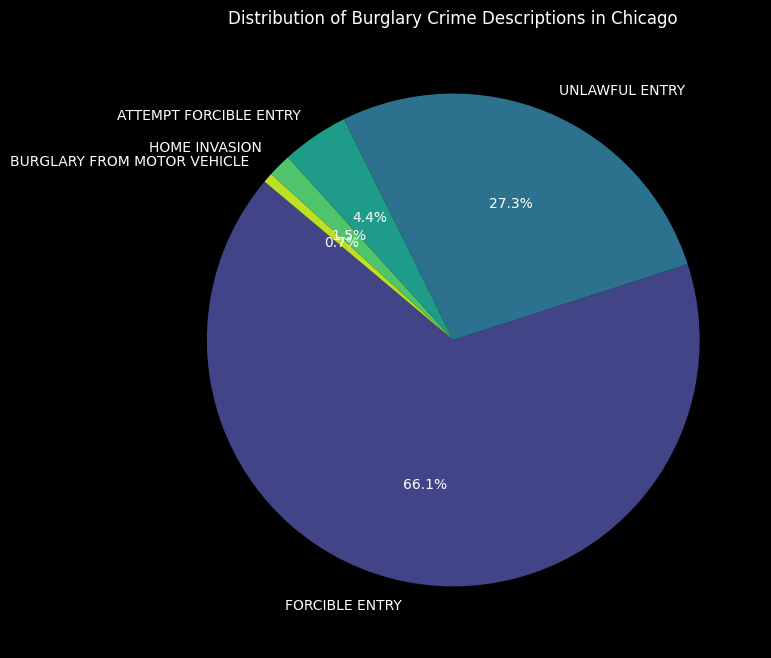

In [64]:
burglary_df = data[data['Primary Type'] == "BURGLARY"]
burglary_desc_counts = burglary_df['Description'].value_counts().head(10)

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(burglary_desc_counts)))

plt.figure(figsize=(8,8))
plt.pie(
    burglary_desc_counts,
    labels=burglary_desc_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title("Distribution of Burglary Crimes in Chicago")
plt.show()



<div style="color:#E79696"><h3>Insight 24:</h3><p style="font-size:16px">Based on the pie chart, Forcible Entry accounts for the largest portion of burglary crimes, making up around 66% of all recorded cases. This means that most burglary incidents involve breaking into a property through forced means, showing that physical intrusion remains the most common method used by offenders.</p></div>

<div style="color:#E79696"><h3>Insight 25:</h3><p style="font-size:16px">Unlawful Entry follows with about 27%, while Attempted Forcible Entry, Home Invasion, and Burglary from Motor Vehicle make up only a small share. These smaller portions indicate that although other burglary types occur, they are far less frequent compared to direct forced entry, emphasizing that most burglaries involve active breaking and entering rather than attempted or non-forcible access.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q16. Which crime descriptions occur most frequently under Deceptive Practice cases?
</strong></h1>

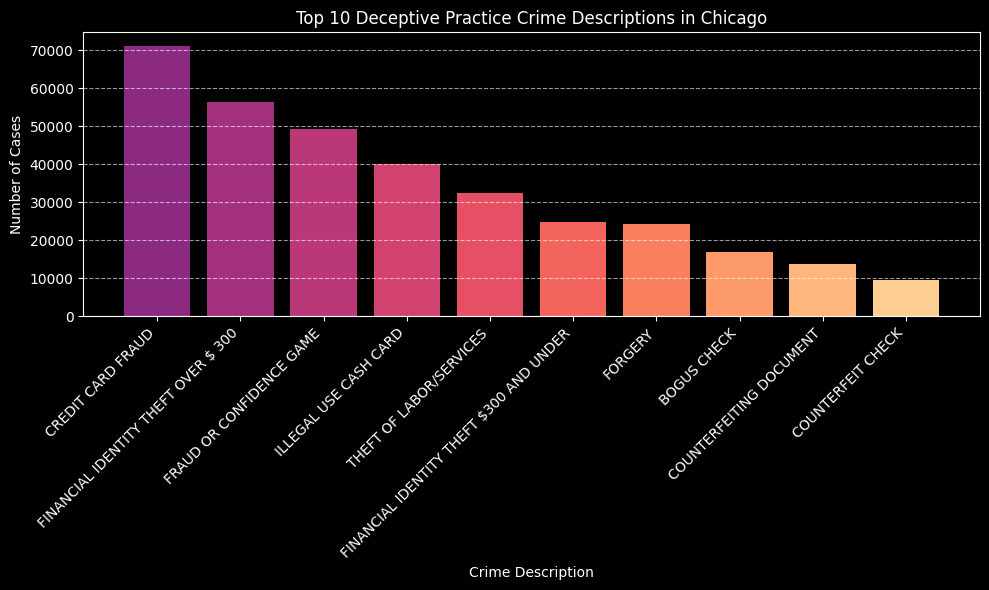

In [66]:
deceptive_df = data[data['Primary Type'] == "DECEPTIVE PRACTICE"]
deceptive_desc_counts = deceptive_df['Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(
    deceptive_desc_counts.index,
    deceptive_desc_counts.values,
    color=plt.cm.magma(np.linspace(0.4, 0.9, len(deceptive_desc_counts)))
)

plt.title("Top 10 Deceptive Practice Crime Descriptions in Chicago")
plt.xlabel("Crime Description")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="color:#E79696"><h3>Insight 26:</h3><p style="font-size:16px">Credit card fraud happens the most among all deceptive practice crimes, showing how common financial scams are in the city.</p></div>

<div style="color:#E79696"><h3>Insight 27:</h3><p style="font-size:16px">Financial identity theft and fraud or confidence games also occur often, meaning people still easily fall for money-related tricks.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q17. How often does Weapons Violation Happened in different Location Descriptions?
</strong></h1>

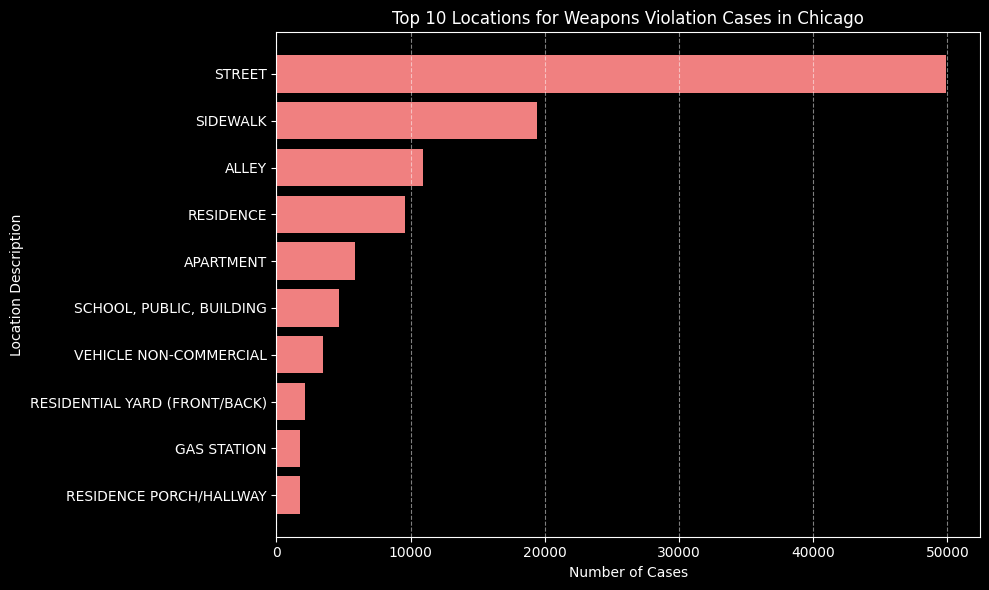

In [74]:
weapons_data = data[data['Primary Type'] == 'WEAPONS VIOLATION']

location_counts = weapons_data['Location Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(location_counts.index, location_counts.values, color='lightcoral')

plt.title("Top 10 Locations for Weapons Violation Cases in Chicago")
plt.xlabel("Number of Cases")
plt.ylabel("Location Description")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="color:#E79696"><h3>Insight 28:</h3><p style="font-size:16px">Most weapons violations occur on streets and sidewalks, showing that public areas remain the most common spots for such offenses. However, residential places like homes and apartments also report noticeable cases, suggesting that weapon-related incidents extend beyond public areas into private spaces. Although schools, vehicles, and gas stations have fewer recorded incidents, their inclusion still highlights potential safety risks in everyday environments.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q18. How does Weapon Violation Cases amount changes over year?
</strong></h1>

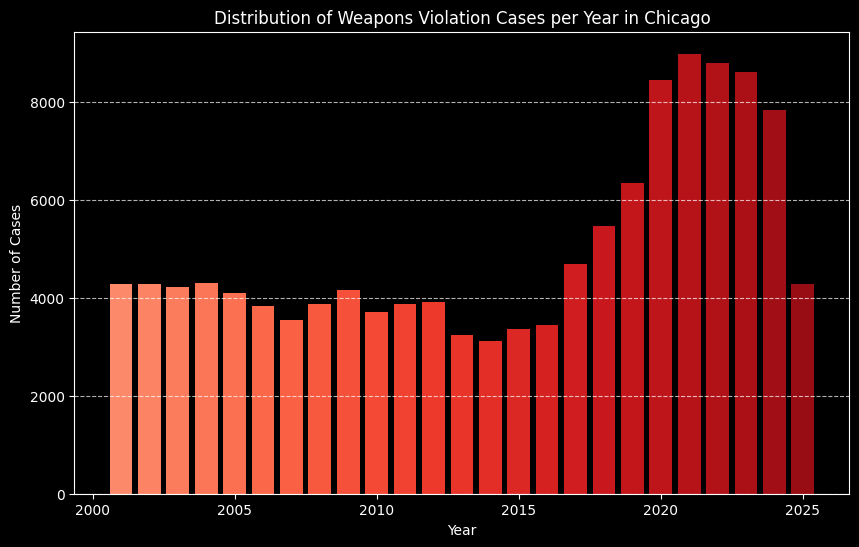

In [75]:
weapon_year_counts = data[data['Primary Type'] == 'WEAPONS VIOLATION']['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(weapon_year_counts.index, weapon_year_counts.values, color=plt.cm.Reds(np.linspace(0.4, 0.9, len(weapon_year_counts))))

plt.title("Distribution of Weapons Violation Cases per Year in Chicago")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="color:#E79696"><h3>Insight 29:</h3><p style="font-size:16px">From 2000 to around 2015, the number of weapons violation cases in Chicago stayed fairly steady, with only small changes each year. This suggests that the situation was relatively stable during those years.</p></div></p></div>

<div style="color:#E79696"><h3>Insight 30:</h3><p style="font-size:16px">Starting around 2016, cases began to rise sharply, peaking between 2020 and 2022. Although the numbers have slightly dropped afterward, they still remain higher than the early 2000s, showing that weapon-related offenses continue to be a concern in recent years.</p></div>

<h1 style="text-align:center; color:#ff6b6b;"><strong>Q19. Where do Prostitution-related crimes most frequently occur in Chicago?
</strong></h1>

In [87]:
prostitution_data = data[data['Primary Type'] == 'PROSTITUTION']

prostitution_data = prostitution_data.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(
    location=[prostitution_data['Latitude'].mean(), prostitution_data['Longitude'].mean()],
    zoom_start=11
)

HeatMap(
    prostitution_data[['Latitude', 'Longitude']],
    radius=10,
    blur=3,
    max_zoom=1
).add_to(m)

m.save("prost_heatmap.html")
m


<div style="color:#E79696"><h3>Insight 31:</h3><p style="font-size:16px">The heatmap shows clear hotspots for prostitution cases, especially near the pier, West Madison Street, North Cicero Avenue, and along other major roads.</p></div>

<div style="color:#E79696"><h3>Insight 32:</h3><p style="font-size:16px">These concentrated areas suggest that prostitution is not evenly spread across the city but tends to cluster in specific, high-activity locations.</p></div>

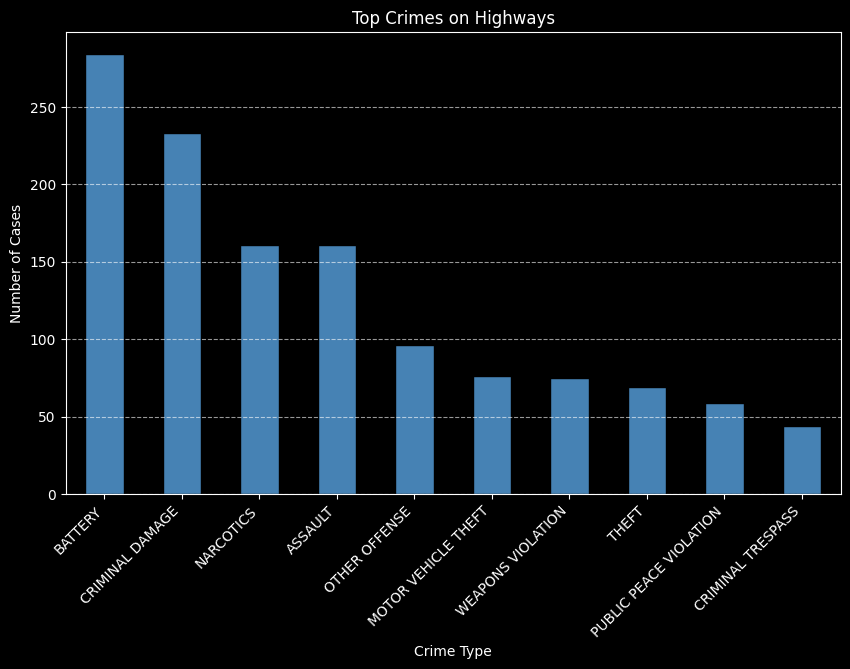

Primary Type
BATTERY                   284
CRIMINAL DAMAGE           233
NARCOTICS                 161
ASSAULT                   161
OTHER OFFENSE              96
MOTOR VEHICLE THEFT        76
WEAPONS VIOLATION          75
THEFT                      69
PUBLIC PEACE VIOLATION     59
CRIMINAL TRESPASS          44
Name: count, dtype: Int64

In [86]:
highway_df = data[data['Location Description'].str.contains("HIGHWAY", na=False)]

highway_crimes = highway_df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
highway_crimes.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title("Top Crimes on Highways")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

highway_crimes


<div style="color:#E79696"><h3>Insight 33:</h3><p style="font-size:16px">The two most frequent crimes reported on highways are Battery (284 cases) and Criminal Damage (233 cases). Together, these two categories alone account for 517 cases, or approximately 41% of all top crimes listed. This highlights that both direct physical violence against individuals and damage to property (likely vehicles) are the primary safety concerns in this environment.</p></div>

<div style="color:#E79696"><h3>Insight 34:</h3><p style="font-size:16px">Assault and Narcotics violations are tied as the third most common crimes, with 161 cases each. This equal ranking suggests that highways are not only locations for interpersonal violence but are also significant corridors for drug-related activities. This dual threat indicates that law enforcement may face both spontaneous public safety incidents and more organized criminal operations.</p></div>

<div style="color:#E79696"><h3>Insight 35:</h3><p style="font-size:16px">While highways are centered around vehicles, Motor Vehicle Theft (76 cases) is significantly less frequent than crimes like Battery (284 cases), Criminal Damage (233 cases), or even Assault (161 cases). This implies that a person on the highway is more likely to become a victim of physical harm or have their vehicle vandalized than they are to have their vehicle stolen outright.</p></div>